<div style="width: 100%; overflow: hidden;">
    <div style="width: 500px; float: left;"> 
        <h1>Ingenieurinformatik – Übung</h1>
        Lehrstuhl <b>Computational Civil Engineering</b><br>
        Kontakt: <a href = "mailto: cce-inginf@uni-wuppertal.de">Email senden</a> | Individuelle Kontakte siehe Webseite des Lehrstuhls<br>
        Links: 
        <a href="cce.uni-wuppertal.de/inginf">Vorlesungsskript</a> | 
        <a href="cce.uni-wuppertal.de/">Webseite des Lehrstuhls</a>
    </div>
    <div style="float:right;"> 
        <img src="logo_cce_combined.png" style="width:150px;"/>
    </div>
</div>

# Bildbearbeitung

Die nachfolgenden Aufgaben behandeln das Einlesen und Bearbeiten von Bilddateien. Verwenden die Module `Matplotlib` zum einlesen und darstellen der Dateien und `Numpy` zur Datenverarbeitung. JPEG Bilder wie sie im Folgenden verwendet werden, können mittels Python als dreidimensionales Array eingelesen werden. Oftmals empfielt es sich die Bearbeitung getrennt für die drei Farbkanäle $(R, G, B)$ vorzunehmen.

## Weißabgleich
Der Weißabgleich dient der Anpassung der Farbtemperatur eines Fotos an die Lichtbedingungen des Aufnahmeortes. Dies kann ereicht werden, indem die Intensität der drei Farbkanäle des Fotos anhand eines Referenzpixels skaliert werden. Der Referenzpixel wird dabei aus einem Bereich des Bildes ausgewählt, der wahrheitsgemäß als weiß oder grau angenommen wird, für den also gilt $R = G = B$.

Nachfolgendes Foto weißt durch einen falschen Weißabgleich einen erheblichen Blaustich auf. Wählen Sie einen Referenzpixel innerhalb des Bildes und korrigieren Sie die Intensitäten der drei Farbkanäle auf ein einheitliches Niveau. Skalieren Sie sämtliche Pixel des Bildes anhand der zuvor bestimmten Korrekturfaktoren.  

### Lösung

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

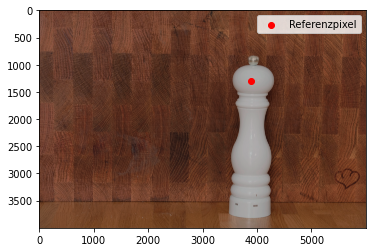

In [7]:
img_dir = 'testbilder'

file = os.path.join(os.getcwd(), img_dir, 'bild_wa.JPG')
image = plt.imread(file)

x = 3900
y = 1300
ref_pixel = image[y,x]
plt.scatter(x,y, color='red', label="Referenzpixel")
rgb_scale = ref_pixel/ref_pixel[1]
image_wb = (image/rgb_scale).astype('uint8')
plt.imshow(image_wb)
plt.legend(loc='best')

## Image Stacking
Der Bergriff "Image Stacking" bezeichnet das überlagern von Bildern mit dem Ziel unterschiedliche Effekte und Wirkungen zu erzielen. Neben dem Erzielen von künstlerischen Effekten können hiermit auch bewegte Objekte aus der Überlagerung von Fotos des selben Bildausschnitts erzielt werden.
### Geisterbilder
Überlagern Sie die Fotos 1 - 5.


### Lösung

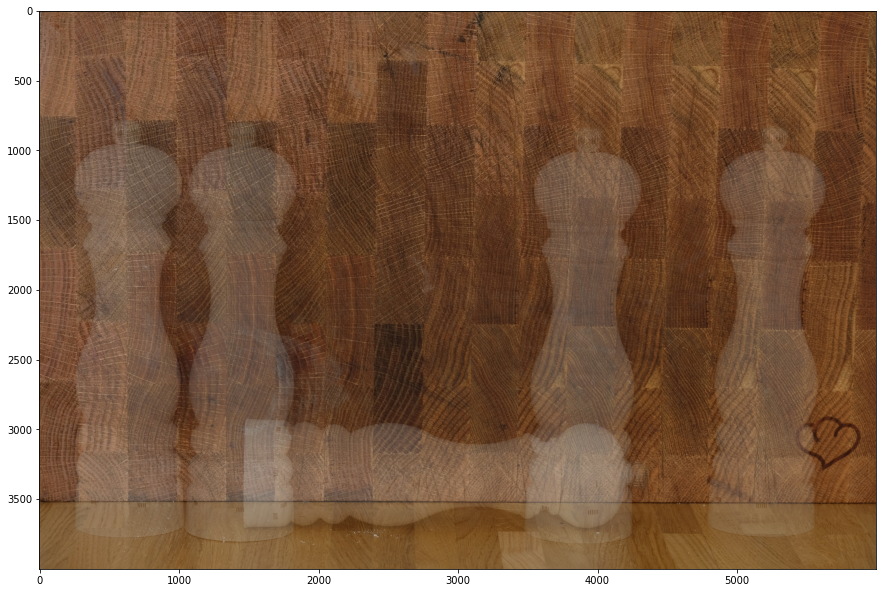

In [3]:
r_layers = []
g_layers = []
b_layers = []

img_dir = 'testbilder'
for i in range(1,6)[0:5]:
    file = os.path.join(os.getcwd(), img_dir, f'bild_{i}.JPG')
    image = plt.imread(file)
    r_layers.append(image[:,:,0])
    g_layers.append(image[:,:,1])
    b_layers.append(image[:,:,2])
r_mean = np.mean(r_layers, axis=0)
g_mean = np.mean(g_layers, axis=0)
b_mean = np.mean(b_layers, axis=0)


rgb_mean = np.dstack((r_mean, g_mean, b_mean)).astype('uint8')

fig = plt.figure()
fig.set_size_inches(15,15)
plt.imshow(rgb_mean)


### Entfernen von bewegten Objekten
Erzeugen Sie aus der selbigen Bildserie ein Bild, welches lediglich den Hintergrund ohne die Mühle darstellt. Überlagern Sie erneut die einzelnen Bilder und wenden Sie Sie einen Hochpassfilter (z.B. Median) auf die einzelnen Farbkanäle an um abweichende Pixelwerte zu eliminieren. 

### Lösung

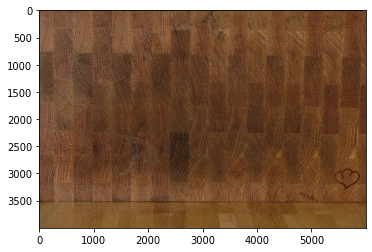

In [4]:
r_med = np.median(r_layers, axis=0)
g_med = np.median(g_layers, axis=0)
b_med = np.median(b_layers, axis=0)
rgb_med = np.dstack((r_med, g_med, b_med)).astype('uint8')

plt.imshow(rgb_med)


## Freistellen von Objekten
Das Freistellen von Objekten kann über verschiedene Methoden mit unterschiedlicher Komplexizität erfolgen. Eine einfache, wenn auch äußerst fehleranfällige Methode ist das Maskieren anhand eines Schwellenwertes. Maskieren Sie die Bereiche um die Kerze herum anhand von oberen oder unteren Schwellenwerten eines oder mehrer Farbkanäle. Platzieren Sie die Kerze anschließend innerhalb des zweiten Bildes.

### Lösung

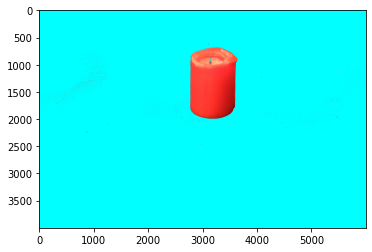

In [9]:
file = os.path.join(os.getcwd(), img_dir, 'bild_th.JPG')
image = plt.imread(file)
th_r = 120
th_g = 0
th_b = 200
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]
mask = np.where((r > th_r) & (g > th_g) & (b < th_b), 1, 0)
red = np.where(mask==1, image[:,:,0],0)
green = np.where(mask==1, image[:,:,1],255)
blue = np.where(mask==1, image[:,:,2],255)
rgb_masked = np.dstack((red, green, blue)).astype('uint8')
plt.imshow(rgb_masked)
new_img_red

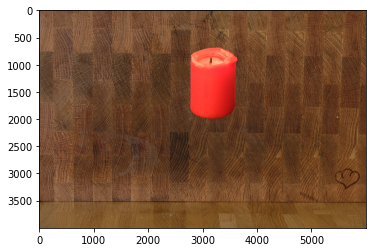

In [15]:
new_img_red = np.where(mask==1, image[:,:,0],rgb_med[:,:,0])
new_img_green = np.where(mask==1, image[:,:,1],rgb_med[:,:,1])
new_img_blue = np.where(mask==1, image[:,:,2],rgb_med[:,:,2])
new_img_rgb = np.dstack((new_img_red, new_img_green, new_img_blue)).astype('uint8')

plt.imshow(new_img_rgb)